In [1]:
# Generating Fake Data from python package "Faker"


In [2]:
pip install Faker

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# initialize a generator
from faker import Faker
fake = Faker()


In [4]:
#create some fake data
print(fake.name())
print(fake.date_between(start_date='-30y', end_date='today'))
print(fake.color_name())

Andrea Hudson
2010-03-30
PaleGoldenRod


In [8]:
#creating some fake profiles from data
print(fake.profile())

{'job': 'Secretary, company', 'company': 'Hardy, Kramer and Nelson', 'ssn': '244-96-9763', 'residence': '92283 Smith Place Suite 827\nSouth Christophertown, AZ 21012', 'current_location': (Decimal('82.2752715'), Decimal('-78.781605')), 'blood_group': 'A+', 'website': ['http://www.jackson-kelly.com/'], 'username': 'jennifer43', 'name': 'Elizabeth Rice', 'sex': 'F', 'address': '02181 Cassandra Trafficway\nLake Herbertport, GA 03768', 'mail': 'markodonnell@gmail.com', 'birthdate': datetime.date(1915, 9, 30)}


In [9]:
# create a list of color names
colors = [fake.color_name() for x in range(4)]
print(colors)

['Orange', 'Khaki', 'LightPink', 'LightGreen']


In [10]:
# Using a list comprehension to generate a dictionary 
# of worker information with the worker’s name and hire date:
fake_workers = [
    {'Worker Name':fake.name(), 
     'Hire Date':fake.date_between(start_date='-30y', end_date='today')
    } for x in range(10)]
                 
print(fake_workers)

[{'Worker Name': 'Catherine Wilson', 'Hire Date': datetime.date(2021, 11, 16)}, {'Worker Name': 'Parker Rosales', 'Hire Date': datetime.date(2003, 11, 22)}, {'Worker Name': 'Matthew Burton', 'Hire Date': datetime.date(1998, 9, 29)}, {'Worker Name': 'Damon Contreras', 'Hire Date': datetime.date(2017, 8, 15)}, {'Worker Name': 'Meghan Castillo', 'Hire Date': datetime.date(2001, 10, 27)}, {'Worker Name': 'Emily Richardson', 'Hire Date': datetime.date(2021, 7, 2)}, {'Worker Name': 'Crystal Brown', 'Hire Date': datetime.date(1999, 1, 20)}, {'Worker Name': 'Alexander Howard', 'Hire Date': datetime.date(2006, 3, 2)}, {'Worker Name': 'April Perry', 'Hire Date': datetime.date(2017, 6, 20)}, {'Worker Name': 'Leslie Weber', 'Hire Date': datetime.date(2016, 6, 13)}]


In [29]:
import numpy as np
import random
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
# Use numpy.random.choice to randomly select a color from our colors list we created using Faker above:
# numpys random choice to select a color from our colors list
np.random.choice(colors)

'LightGreen'

In [24]:
# generate an array of colors with a list comprehension
[np.random.choice(colors) for x in range(5)]

['Khaki', 'LightGreen', 'Orange', 'Khaki', 'Orange']

In [25]:
# generate an array of colors with differing probabilities
[np.random.choice(colors, p=[0.1, 0.6, 0.1, 0.2]) for x in range(10)]

['Khaki',
 'Orange',
 'LightPink',
 'LightPink',
 'Khaki',
 'LightPink',
 'LightPink',
 'Khaki',
 'Khaki',
 'Khaki']

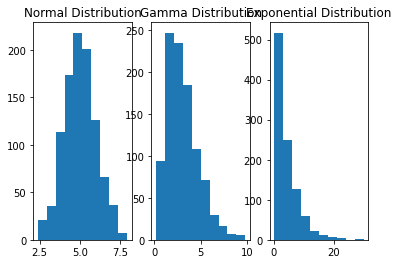

In [30]:
# generate normal distribution
normal_dist = np.random.normal(loc=5, scale=1, size=1000)

# generate gamma distribution
gamma_dist = np.random.gamma(shape=3, scale=1, size=1000)

# generate exponential distribution
exp_dist = np.random.exponential(scale=4, size=1000)

# histograms to visualize the distributions
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
ax1.hist(normal_dist)
ax1.set_title('Normal Distribution')

ax2.hist(gamma_dist)
ax2.set_title('Gamma Distribution')

ax3.hist(exp_dist)
ax3.set_title('Exponential Distribution')

plt.show()

In [31]:
import pandas as pd
import numpy as np
import faker

# create some fake data
fake = Faker()

# function to create a dataframe with fake values for our workers
def make_workers(num):
    
    # lists to randomly assign to workers
    status_list = ['Full Time', 'Part Time', 'Per Diem']
    team_list = [fake.color_name() for x in range(4)]
    

    fake_workers = [{'Worker ID':x+1000,
                  'Worker Name':fake.name(), 
                  'Hire Date':fake.date_between(start_date='-30y', end_date='today'),
                  'Worker Status':np.random.choice(status_list, p=[0.50, 0.30, 0.20]), # assign items from list with different probabilities
                  'Team':np.random.choice(team_list)} for x in range(num)]
        
    return fake_workers

worker_df = pd.DataFrame(make_workers(num=5000))
worker_df.head()

,Worker ID,Worker Name,Hire Date,Worker Status,Team
0,1000,Mary Glenn,1996-11-16,Part Time,Aquamarine
1,1001,Brenda Williams,1999-11-06,Part Time,Snow
2,1002,Kathy Lamb,2003-11-13,Full Time,MistyRose
3,1003,Valerie Thompson,2007-02-24,Full Time,MistyRose
4,1004,Raymond Lopez,2000-11-03,Per Diem,Snow


In [32]:
# function to create widget data

def make_widget_data(num):
    
    fake_widgets = [{'Item Number':id(y),
                     'Step 1':np.random.gamma(shape=3, scale=1),
                     'Step 2':np.random.normal(5), 
                     'Step 3':np.random.exponential(4)} for y in range(num)]
    
    return fake_widgets

# empty list to store our widget dataframes in    
dfs_list = []

# now lets make some widget data for each worker
# iterate through the worker dataframe
for index, row in worker_df.iterrows():
    
    # not all workers work at the same rate - or the same number of hours
    # randomly select a number of widgets for them to create based on 'worker status'
    if row['Worker Status'] == 'Full Time':
        num_widgets = random.randrange(500, 1000)
    elif row['Worker Status'] == 'Part Time':
        num_widgets = random.randrange(100, 500)
    else:
        num_widgets = random.randrange(1, 1000)
        
        # make widgets for each worker
    tmp_widgets = pd.DataFrame(make_widget_data(num=num_widgets))
    
    # add worker id so we know who made the widget
    tmp_widgets['Worker ID'] = row['Worker ID']
    
    # make sure item number is unique by appending worker id
    tmp_widgets['Item Number'] = tmp_widgets['Item Number'].astype('str')+ '-' + tmp_widgets['Worker ID'].astype('str')
    
    # append to df list
    dfs_list.append(tmp_widgets)
    
# concatenate all the dfs 
widget_df = pd.concat(dfs_list)
print(widget_df.shape)
widget_df.head()

(2822648, 5)


,Item Number,Step 1,Step 2,Step 3,Worker ID
0,9788928-1000,3.341405,7.042393,2.335866,1000
1,9788960-1000,2.963900,4.149895,3.552613,1000
2,9788992-1000,2.917185,4.791336,2.976155,1000
3,9789024-1000,1.763735,7.007945,1.421883,1000
4,9789056-1000,5.222149,6.415981,0.365557,1000


In [35]:
import csv
worker_df.to_csv('data_workers.csv', index=False)
widget_df.to_csv('data_widgets.csv', index=False)